In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## **Drop month, day, year**

In [4]:
df.drop(columns=['month','day','year'],axis=1,inplace=True)

In [4]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)


In [6]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## **Independent and Dependent Features**

In [7]:

X=df.drop('FWI',axis=1)
Y=df['FWI']

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
Y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

## **Train Test Split**

In [9]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## **Feature Selection Based on Correlation**

In [10]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

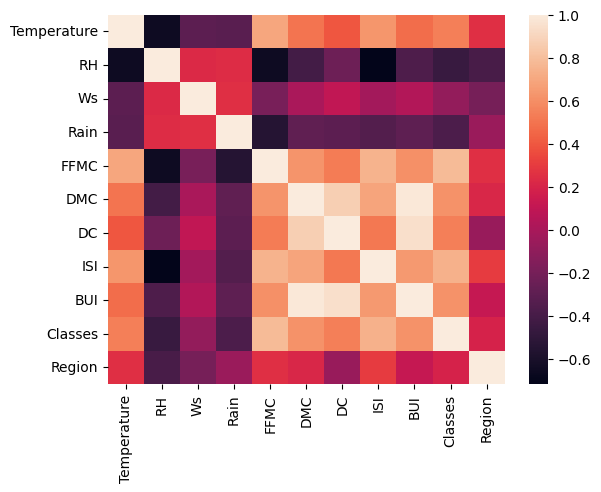

In [11]:
sb.heatmap(x_train.corr())

## **To find multicollinearity with a threshold - Ideally, it will be set by Domain Expertise**

In [14]:
def correlation_check(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [15]:
corr_features=correlation_check(dataset=x_train, threshold=0.85)

In [16]:
corr_features

{'BUI', 'DC'}

## **Drop features when correlation is more that 0.85**

In [17]:

x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [18]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

## **Feature Scaling or Standardization**

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_train_scaled.shape

(182, 9)

## **BOXPLOTS TO UNDERSTAND EFFECT OF STANDARD SCALER**

Text(0.5, 1.0, 'x_train before standardization')

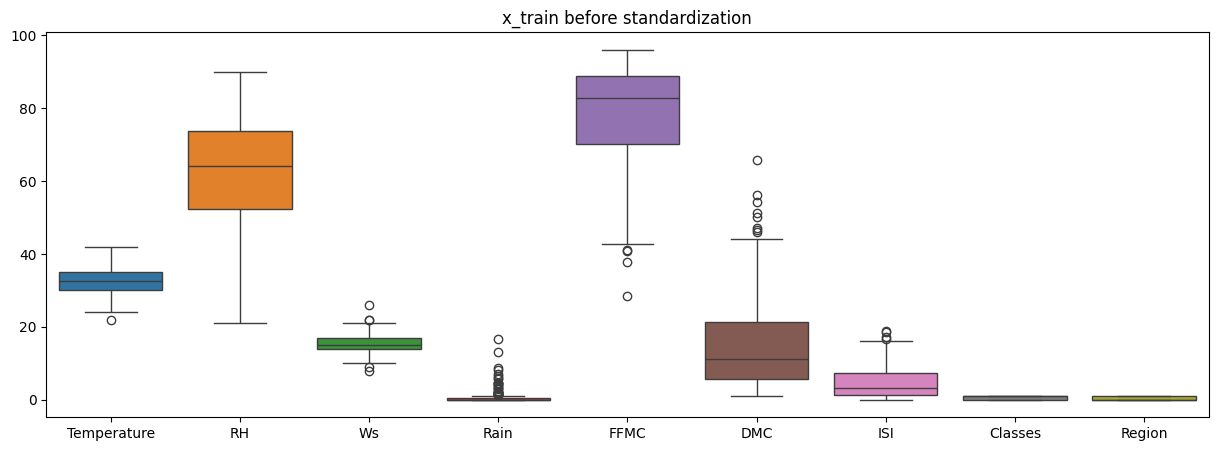

In [22]:
plt.subplots(figsize=(15,5))

sb.boxplot(data=x_train)
plt.title('x_train before standardization')

Text(0.5, 1.0, 'x_train after standardization')

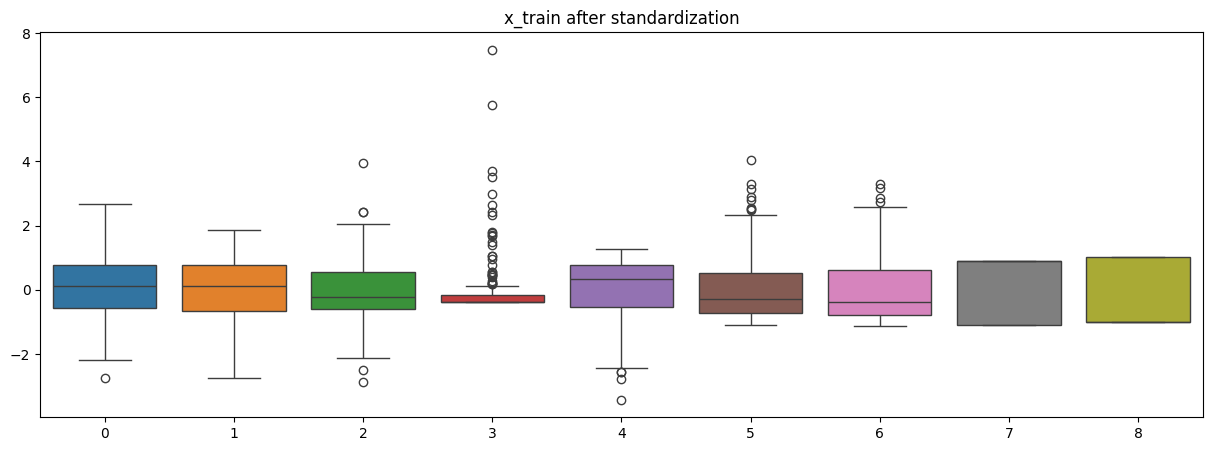

In [23]:
plt.subplots(figsize=(15,5))
sb.boxplot(data=x_train_scaled)
plt.title('x_train after standardization')

## **Calculate Performance**

In [24]:
def check_performance(metric_name, y_true, y_pred):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    print()
    print(f"Metric Name : {metric_name}")
    print("+++++++++++++++++++++++++++++++++++++++++++++")
    print(f"Mean Squared Error is {mean_squared_error(y_true, y_pred)}")
    print(f"Mean Absolute Error is {mean_absolute_error(y_true, y_pred)}")
    print(f"R2 Score is {r2_score(y_true, y_pred)}")
    print("+++++++++++++++++++++++++++++++++++++++++++++")


def get_scatter_plot(metric_name, y_true, y_pred):
    from matplotlib import pyplot as plt
    print()
    print(f"Metric Name : {metric_name}")
    print("+++++++++++++++++++++++++++++++++++++++++++++")
    plt.scatter(y_true,y_pred)

## **LINEAR REGRESSION MODEL**


Metric Name : Linear Regression
+++++++++++++++++++++++++++++++++++++++++++++
Mean Squared Error is 0.674276687379158
Mean Absolute Error is 0.5468236465249978
R2 Score is 0.9847657384266951
+++++++++++++++++++++++++++++++++++++++++++++

Metric Name : Linear Regression
+++++++++++++++++++++++++++++++++++++++++++++


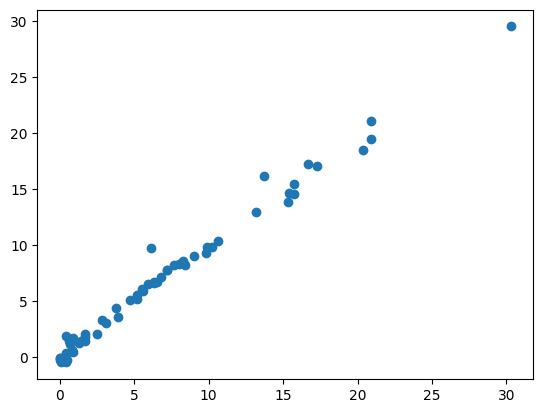

In [25]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)

check_performance("Linear Regression",y_test,y_pred)
get_scatter_plot("Linear Regression",y_test,y_pred)

## **LASSO REGRESSION**


Metric Name : LASSO REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++
Mean Squared Error is 2.2483458918974772
Mean Absolute Error is 1.133175994914409
R2 Score is 0.9492020263112388
+++++++++++++++++++++++++++++++++++++++++++++

Metric Name : LASSO REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++


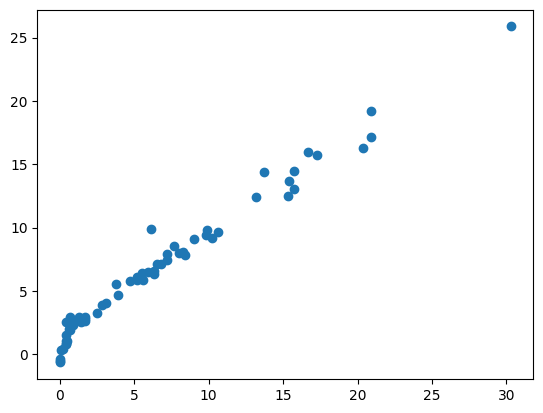

In [26]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)

check_performance("LASSO REGRESSION", y_test, y_pred)

get_scatter_plot("LASSO REGRESSION", y_test, y_pred)

## **LASSO CROSS VALIDATION REGRESSION**


Metric Name : LASSO CROSS VALIDATION REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++
Mean Squared Error is 0.792499555474362
Mean Absolute Error is 0.619970115826343
R2 Score is 0.9820946715928275
+++++++++++++++++++++++++++++++++++++++++++++

Metric Name : LASSO CROSS VALIDATION REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++


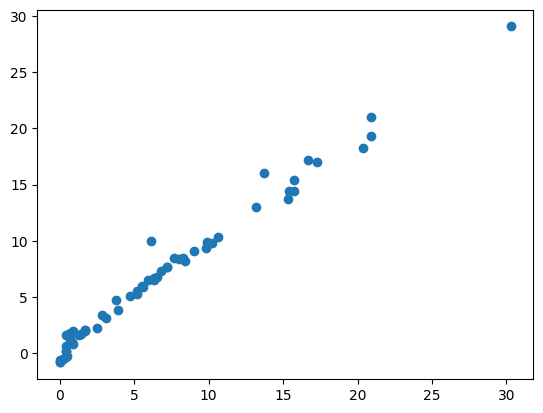

In [27]:
from sklearn.linear_model import LassoCV

##
# Lasso Linear model with iterative fitting along a regularization path. 
# 
# Lasso Cross Validation technique will try changing all parameters and select most suitable parameters
# 
# lassocv has a parameter called alpha. This can be selected for some hyperparameter tuning. 
# One hyperparameter tuning is called as "Cross Validation Technique".
#
##

lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_pred=lassocv.predict(x_test_scaled)

check_performance("LASSO CROSS VALIDATION REGRESSION", y_test, y_pred)

get_scatter_plot("LASSO CROSS VALIDATION REGRESSION", y_test, y_pred)

In [28]:
## LassoCV parameters
print(f"Finally selected Alpha value is {lassocv.alpha_}")
print(f"All considered Alpha values are {lassocv.alphas_}")
print(f"Cross Validations with 100 Alphas. So, 100 MSE values are {lassocv.mse_path_}")

Finally selected Alpha value is 0.05725391318234408
All considered Alpha values are [7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0

## **RIDGE REGRESSION**


Metric Name : RIDGE REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++
Mean Squared Error is 0.6949198918152096
Mean Absolute Error is 0.5642305340105715
R2 Score is 0.9842993364555512
+++++++++++++++++++++++++++++++++++++++++++++

Metric Name : RIDGE REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++


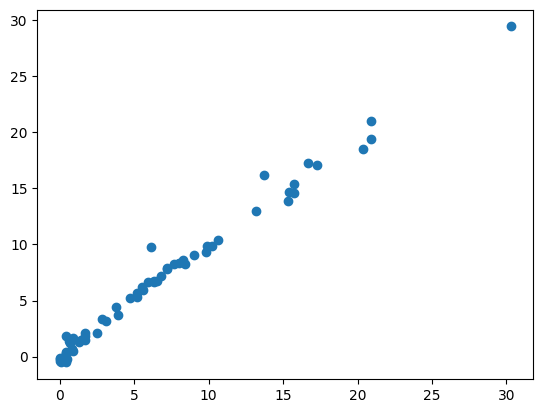

In [29]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)

check_performance("RIDGE REGRESSION", y_test, y_pred)

get_scatter_plot("RIDGE REGRESSION", y_test, y_pred)

## **RIDGE CROSS VALIDATION REGRESSION**


Metric Name : RIDGE CROSS VALIDATION REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++
Mean Squared Error is 0.6949198918152096
Mean Absolute Error is 0.5642305340105715
R2 Score is 0.9842993364555512
+++++++++++++++++++++++++++++++++++++++++++++

Metric Name : RIDGE CROSS VALIDATION REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++


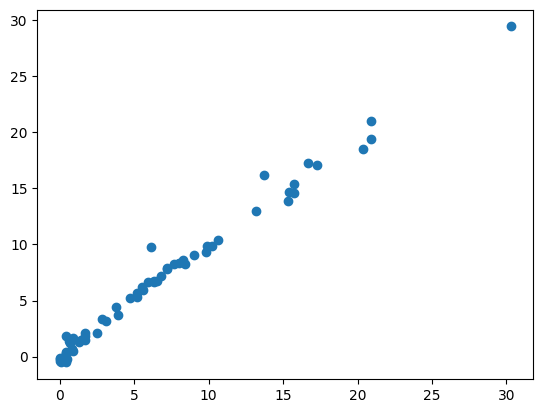

In [ ]:
from sklearn.linear_model import RidgeCV


##
# Ridge regression with built-in cross-validation. 
# 
# By default this performs generalized cross-validation, which is a form of efficient Leave-One-Out cross-validation. This means if we don't pass cv value, it uses Leave-One-Out cross-validation.
#
##

ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)

check_performance("RIDGE CROSS VALIDATION REGRESSION", y_test, y_pred)

get_scatter_plot("RIDGE CROSS VALIDATION REGRESSION", y_test, y_pred)

In [31]:
## RidgeCV parameters
from pprint import pprint
print(f"Finally selected Alpha value is {ridgecv.alphas}")
pprint(f"Parameters is {ridgecv.get_params()}")

Finally selected Alpha value is (0.1, 1.0, 10.0)
("Parameters is {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': "
 "5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, "
 "'store_cv_results': None, 'store_cv_values': 'deprecated'}")


## **ELASTICNET REGRESSION**


Metric Name : ELASTICNET REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++
Mean Squared Error is 5.5172511010252245
Mean Absolute Error is 1.8822353634896005
R2 Score is 0.8753460589519703
+++++++++++++++++++++++++++++++++++++++++++++

Metric Name : ELASTICNET REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++


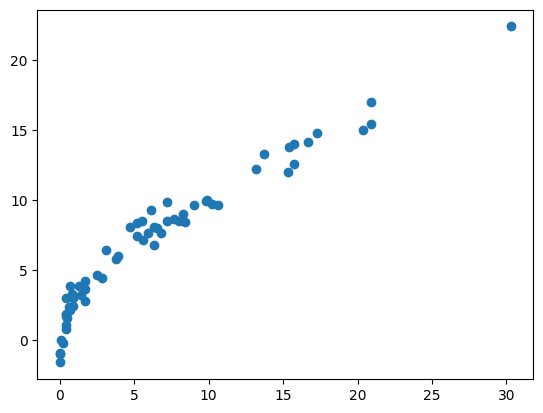

In [32]:
from sklearn.linear_model import ElasticNet

elntreg=ElasticNet()
elntreg.fit(x_train_scaled,y_train)
y_pred=elntreg.predict(x_test_scaled)

check_performance("ELASTICNET REGRESSION", y_test, y_pred)

get_scatter_plot("ELASTICNET REGRESSION", y_test, y_pred)

## **ELASTICNET CROSS VALIDATION REGRESSION**


Metric Name : ELASTICNET CROSS VALIDATION REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++
Mean Squared Error is 0.8222830416276258
Mean Absolute Error is 0.6575946731430898
R2 Score is 0.9814217587854941
+++++++++++++++++++++++++++++++++++++++++++++

Metric Name : ELASTICNET CROSS VALIDATION REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++


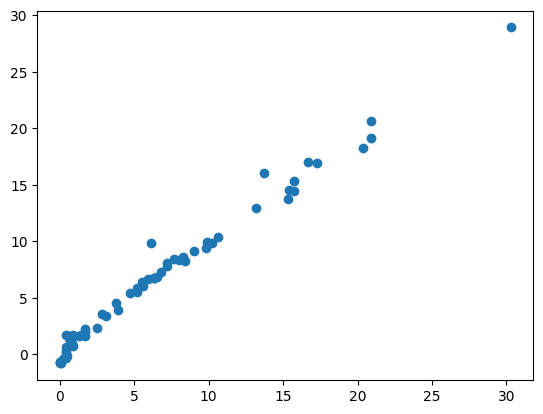

In [33]:
from sklearn.linear_model import ElasticNetCV

##
# 
# L1 - 50% and L2 - 50%
# 
# 
# ##

elntregcv=ElasticNetCV()
elntregcv.fit(x_train_scaled,y_train)
y_pred=elntregcv.predict(x_test_scaled)

check_performance("ELASTICNET CROSS VALIDATION REGRESSION", y_test, y_pred)

get_scatter_plot("ELASTICNET CROSS VALIDATION REGRESSION", y_test, y_pred)

In [34]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))